In [94]:
%load_ext autoreload
%autoreload 2

import os
from datetime import datetime
import pprint
import glob
import logging
import pickle
import sys
from pprint import pformat

from sacred import Experiment
from sacred.observers import MongoObserver

import pathpy
import numpy as np

from scipy.stats import chi2
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
root_dir = os.curdir
max_nest = 10  # arbitrary, 3 would probably suffice
nest = 0
while "src" not in os.listdir(root_dir) and nest < max_nest:
    # Look up the directory structure for a src directory
    root_dir = os.path.join(os.pardir, root_dir)
    nest += 1

# If you don't find the src directory, the root directory is this directory
root_dir = os.path.abspath(root_dir) if nest < max_nest else os.path.abspath(
    os.curdir)

# Get the source directory and append path to access
# python packages/scripts within directory
if "src" in os.listdir(root_dir):
    src_dir = os.path.join(root_dir)
    sys.path.append(src_dir)

In [44]:
from src.preprocess_experiment import get_dataset
from src.data_processing import generate_temporal_network, get_runs

In [181]:
net = generate_temporal_network("../data/raw/CVE-2017-7529/aggressive_brahmagupta_2425.txt")
print(net)

2020-09-03 15:32:03 [Severity.INFO]	Building index data structures ...
2020-09-03 15:32:03 [Severity.INFO]	Sorting time stamps ...
2020-09-03 15:32:03 [Severity.INFO]	finished.
Nodes:			19
Time-stamped links:	1527
Links/Nodes:		80.36842105263158
Observation period:	[0, 49489242]
Observation length:	 49489242 
Time stamps:		 1527 
Avg. inter-event dt:	 32430.695937090433
Min/Max inter-event dt:	 1/5548078


In [174]:
runs = get_runs("../data/raw/CVE-2017-7529/runs.csv", True)
normal_graphs = [generate_temporal_network(scenario) for i, scenario in enumerate(runs["scenario_name"])]

attacks = get_runs("../data/raw/CVE-2017-7529/runs.csv", False)
attack_graphs = [generate_temporal_network(scenario) for i, scenario in enumerate(attacks["scenario_name"])]

2020-09-03 15:28:59 [Severity.INFO]	Building index data structures ...
2020-09-03 15:28:59 [Severity.INFO]	Sorting time stamps ...
2020-09-03 15:28:59 [Severity.INFO]	finished.
2020-09-03 15:28:59 [Severity.INFO]	Building index data structures ...
2020-09-03 15:28:59 [Severity.INFO]	Sorting time stamps ...
2020-09-03 15:28:59 [Severity.INFO]	finished.
2020-09-03 15:28:59 [Severity.INFO]	Building index data structures ...
2020-09-03 15:28:59 [Severity.INFO]	Sorting time stamps ...
2020-09-03 15:28:59 [Severity.INFO]	finished.
2020-09-03 15:28:59 [Severity.INFO]	Building index data structures ...
2020-09-03 15:28:59 [Severity.INFO]	Sorting time stamps ...
2020-09-03 15:28:59 [Severity.INFO]	finished.
2020-09-03 15:28:59 [Severity.INFO]	Building index data structures ...
2020-09-03 15:28:59 [Severity.INFO]	Sorting time stamps ...
2020-09-03 15:28:59 [Severity.INFO]	finished.
2020-09-03 15:28:59 [Severity.INFO]	Building index data structures ...
2020-09-03 15:28:59 [Severity.INFO]	Sorting 

In [200]:
def analyze_time(temporal_nets):
    
    multi = [x.inter_event_times().flatten() for x in temporal_nets]
    means = [x.mean() for x in multi]
    max_times = [x.max() for x in multi]
    multi = np.concatenate(multi)
    
    max_time = 10000000
    
    observation_lengths = [x.observation_length() for x in temporal_nets]
    print(max(observation_lengths))
    
    # these are my measurements, unsorted
    plt.figure(figsize=(8, 20))
    
    plt.subplot(311)
    plt.hist(means, bins=50, weights=100*np.ones(len(means))/len(means), color='blue', edgecolor='black', alpha=0.5, range=(0, 100000))
    plt.title("Histogram")
    plt.xlabel("Mean time differences")
    plt.ylabel("Percentage of data")
    
    plt.subplot(312)
    plt.hist(max_times, bins=50, weights=100*np.ones(len(means))/len(means), color='blue', edgecolor='black', alpha=0.5, range=(0, max_time))
    plt.title("Histogram")
    plt.xlabel("Max time differences")
    plt.ylabel("Percentage of data")
    
    plt.subplot(313)
    plt.hist(multi, bins=50, weights=100*np.ones(len(multi))/len(multi), color='blue', edgecolor='black', alpha=0.5, range=(0, 100))
    plt.title("Histogram")
    plt.xlabel("Time differences")
    plt.ylabel("Percentage of data")
    
    return multi

59008187
86398764296


array([26, 14,  3, ..., 46,  8, 13])

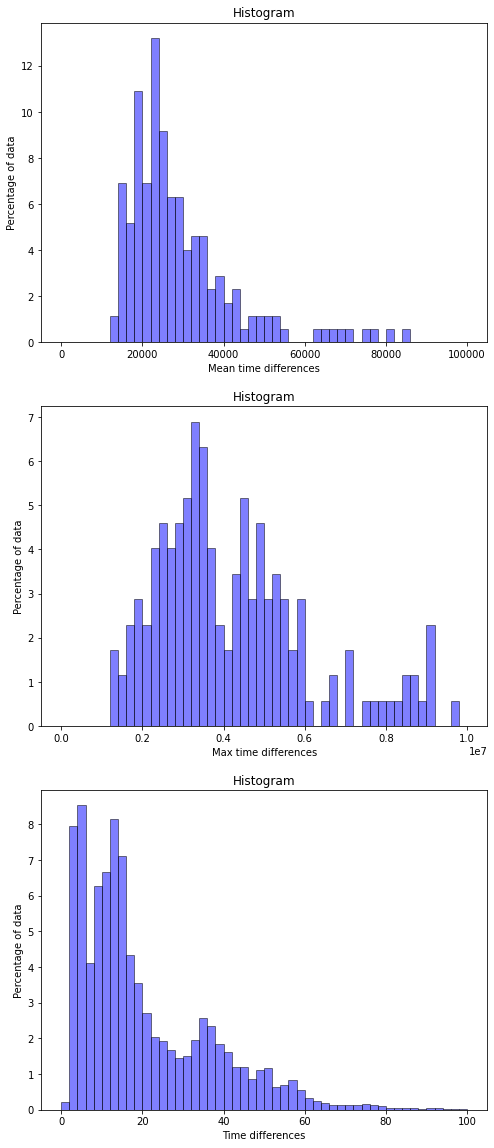

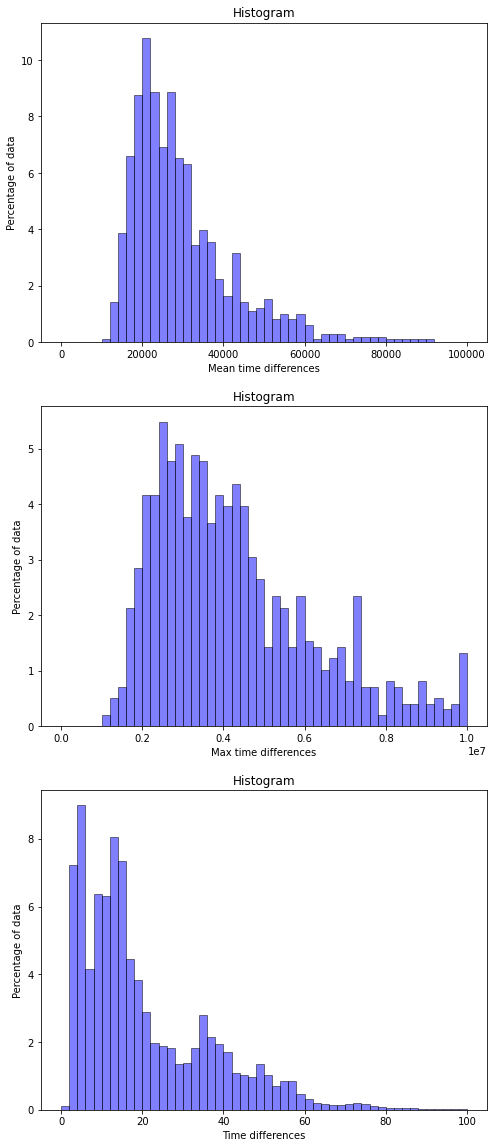

In [201]:
analyze_time(normal_graphs)
analyze_time(attack_graphs)